

> **Group Members**


---


> FA23-MSCS-0004 - Faiz Ali

> FA23-MSCS-0014 - Arsalan Hussain



---



# **FOOD AND BEVERAGE DEMAND FORECASTING**
**Abstract**

Using the Data Science process, we will be exploring data related to food and
beverages. Within the food and beverage sector, we are capable of anticipating and managing demand for foodstuffs. Practical advantages of historical data will be highlighted in the implementation of our project, enabling us to
better predict demand.


---





## 1 - OBJECTIVE AND OVERVIEW
In a customer's perspective, today's customers are looking for quality of taste and want the desired food on their menu. Our goal is therefore to create a system that learns from data which factors have the greatest influence on the product, and the system is able to recognize patterns and trends that predict future behavior and understand customer preferences and as business owners perspective sometimes business owners don't pay attention to the wealth of the data, Thus, companies are able to take benefit from real time analysis and increase business and they do have an opportunity for growth while implementing a good data science method. Therefore, the focus is on those challenges and we are working to find solutions.

### 1.1 Key Factors
In data science, the forecasting system for foods is based on a number of fundamental factors which enable users to make precise and personalized recommendations. To develop an effective food recommendation system, it is necessary to take the most important as our project key factors.


> **Attributes of the data that we aimed at based on our business questions**
*   Restaurant Name: Name of the restaurant
*   City: City in which restaurant is located
*   Country: Country in which restaurant is located
*   Rating: Average rating out of 5
*   Votes: Number of votes casted by people
*   Average Cost for two: Cost for two people in different currencies
*   Has Table booking: yes/no
*   Has Online delivery: yes/ no
*   Cuisines: Cuisines offered by the restaurant

### 1.2 Business Questions

*  Based upon a food review and restaurant rating, predict customer sentiment in the following ways:
  ○ Positive
  ○ Negative
  ○ Neutral

*  Is it possible for us to suggest some restaurants based on their cuisines, ratings, costs, and cities?
*  Doesn't the location also have an impact on achieving a high rating?
*  Analysis of whether the rating for food is also influenced by ordering online(Over the internet).
*  Can we predict customer future ratting on cuisine for the menu item?
* Can the location (city or locality) of a restaurant influence its average cost for two people?
* Is there a relationship between the type of cuisine offered by a restaurant and its aggregate rating?

### 1.3 Data Collection

> This is the prior knowledge phase to gather relevant data about restaurants and their food offerings, including cuisine. We have sourced this data from various channels to ensure that we meet our requirements, to have good amount of data which can help us to forecast in better way and we can able to address the business questions that are integral to the data science process.


> **Sources from which we collect data**
*   Kaggle - https://www.kaggle.com/datasets
*   Gigasheet - https://www.gigasheet.com/sample-data
*   Github Repository - https://github.com/topics/dataset






---




## 2 - DATA PREPARATION

In this phase of data prepration we need to identify and rectify errors, inconsistencies, and missing values etc in the dataset. Along with this need to finding the required attributes, we’ll remove duplicate entities from the dataset and will try to remove unnecessary attributes which are not relevant to our business objective.



> **Exploratory data analysis**

Our Dataset contains 16656 rows × 25 columns which include featuers of restaurant and its cuisine such as restaurant name, cuisine, menu, ratting etc. and we'll explore the data by visualization with various libraries available in python to visualize data.






### 2.1 Required libraries
We need to import libraries that are required to process dataset, which will be using to clean data and which are using to visualize data.

In [ ]:
#Following libraries will be used to perform data exploration
import os
import re
import glob
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns     #Visualisation
import plotly.express as px
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt #Visualisation
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from joblib import dump,load
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder( handle_unknown='ignore')
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.2 Data is being loaded into the DataFrame.



Loading the data into data frame of the python library **panda** and this is the first and most important step of he data exploration or exploratory data analysis. Therefore, we need to read our CSV file which **fDataSet.csv** which has collection of rows and columns and present in the directory.

#### 2.2.a Combine all CSV data files obtained from various sources

The provided code is utilized to concatenate all the files received from the above mentioned sources. Our objective is to consolidate all the data into a single file, which can then be easily go into data cleaning process.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_directory = '/content/drive/MyDrive/Colab Notebooks/Dataset/DS_Dataset'
os.chdir(file_directory)
csv_files = glob.glob('**.csv' )

data = []
for f in csv_files:
    data.append(pd.read_csv(f))

df = pd.concat(data, ignore_index=True)
df.to_csv(os.path.join(file_directory + '/Combined' , 'fDataSet.csv'), index=False)

#### 2.2.b Merge Countries Dataset on country code
Now that we have the country code available in our primary dataset, it is necessary to obtain the corresponding country name for each country code.




In [ ]:
countryDf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/DS_Dataset/Combined/Country-Code.csv")
countryDf

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [ ]:
df = pd.merge(df, countryDf, on = 'Country Code')   # Pandas Merge function to join two dataframes

#### 2.2.c Dataset has been gathered

The CSV **fDataSet.csv** is an unstructured combined of all the dataset sourced from multiple sources, which we have gathered for our project. Now that the data collection phase is complete, we will proceed to the data cleaning phase, where we will transform our unstructured data into a structured and clean dataset.

> **Displays the initial 5 rows of a DataFrame.**


In [ ]:
#To display top five rows of the dataset
df.head()

,Restaurant ID,name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,rating,Rating color,review_text,votes,Unnamed: 0.1,Unnamed: 0,rest_type,Country
0,6317637.0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3.0,4.8,Dark Green,Excellent,314,NaN,NaN,NaN,Phillipines
1,6304287.0,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3.0,4.5,Dark Green,Excellent,591,NaN,NaN,NaN,Phillipines
2,6300002.0,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4.0,4.4,Green,Very Good,270,NaN,NaN,NaN,Phillipines
3,6318506.0,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4.0,4.9,Dark Green,Excellent,365,NaN,NaN,NaN,Phillipines
4,6314302.0,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4.0,4.8,Dark Green,Excellent,229,NaN,NaN,NaN,Phillipines


> **Displays the last 5 rows of a DataFrame.**

In [ ]:
#To display bottom five rows of the dataset
df.tail(6)

,Restaurant ID,name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,rating,Rating color,review_text,votes,Unnamed: 0.1,Unnamed: 0,rest_type,Country
16650,5915054.0,Baltazar,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, K۱l۱�_ ...",Karak�_y,"Karak�_y, ��stanbul",28.981103,41.025785,"Burger, Izgara",...,No,3.0,4.3,Green,Very Good,870,NaN,NaN,NaN,Turkey
16651,5915730.0,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,3.0,4.1,Green,Very Good,788,NaN,NaN,NaN,Turkey
16652,5908749.0,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,3.0,4.2,Green,Very Good,1034,NaN,NaN,NaN,Turkey
16653,5915807.0,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,4.0,3.7,Yellow,Good,661,NaN,NaN,NaN,Turkey
16654,5916112.0,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,4.0,4.0,Green,Very Good,901,NaN,NaN,NaN,Turkey
16655,5927402.0,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,2.0,4.0,Green,Very Good,591,NaN,NaN,NaN,Turkey


Now, we will demonstrate the size of our existing unstructured data set prior to cleaning, which will facilitate the comparison of its size post data preparation.

In [ ]:
df.size

416400

In [ ]:
df.shape

(16656, 25)

> **DataFrame Information**

Additionally, we shall provide an overview of the dataset's information, which will aid in comprehending its contents.


In [ ]:
#data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16656 entries, 0 to 16655
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   float64
 1   name                  16656 non-null  object 
 2   Country Code          16656 non-null  int64  
 3   City                  16656 non-null  object 
 4   Address               16656 non-null  object 
 5   Locality              16656 non-null  object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              16647 non-null  object 
 10  average_cost_for_two  16656 non-null  int64  
 11  currency              9551 non-null   object 
 12  has_table_booking     16656 non-null  object 
 13  has_online_delivery   16656 non-null  object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order men

In [ ]:
#To get the count of the dataset
df.count()

Restaurant ID            9551
name                    16656
Country Code            16656
City                    16656
Address                 16656
Locality                16656
Locality Verbose         9551
Longitude                9551
Latitude                 9551
Cuisines                16647
average_cost_for_two    16656
currency                 9551
has_table_booking       16656
has_online_delivery     16656
Is delivering now        9551
Switch to order menu     9551
Price range              9551
rating                  16656
Rating color             9551
review_text             16656
votes                   16656
Unnamed: 0.1             7105
Unnamed: 0               7105
rest_type                7105
Country                 16656
dtype: int64

In [ ]:
#Description of the data in the DataFrame
#Generates descriptive statistics that summarize the central tendency and shape of a dataset's distribution, excluding NaN values.
#Percentile meaning: how many of the values are less than the given percentile. If the DataFrame contains numerical data
df.describe(include="all")

,Restaurant ID,name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,rating,Rating color,review_text,votes,Unnamed: 0.1,Unnamed: 0,rest_type,Country
count,9.551000e+03,16656,16656.000000,16656,16656,16656,9551,9551.000000,9551.000000,16647,...,9551,9551.000000,16656.000000,9551,16656,16656.000000,7105.000000,7105.000000,7105,16656
unique,NaN,14300,NaN,142,9008,1228,1265,NaN,NaN,3589,...,1,NaN,NaN,6,6,NaN,NaN,NaN,81,15
top,NaN,Cafe Coffee Day,NaN,Bengaluru,Whitefield,"Byresandra,Tavarekere,Madiwala","Connaught Place, New Delhi",NaN,NaN,North Indian,...,No,NaN,NaN,Orange,Not rated,NaN,NaN,NaN,Quick Bites,India
freq,NaN,84,NaN,7105,459,798,122,NaN,NaN,1356,...,9551,NaN,NaN,3737,9253,NaN,NaN,NaN,2840,15757
mean,9.051128e+06,NaN,10.957913,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,1.804837,3.013707,NaN,NaN,170.564902,3552.000000,3552.000000,NaN,NaN
std,8.791521e+06,NaN,43.823284,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,0.905609,1.273289,NaN,NaN,505.894084,2051.181164,2051.181164,NaN,NaN
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,1.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,1.000000,2.800000,NaN,NaN,9.000000,1776.000000,1776.000000,NaN,NaN
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,2.000000,3.400000,NaN,NaN,40.000000,3552.000000,3552.000000,NaN,NaN
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,2.000000,3.800000,NaN,NaN,129.000000,5328.000000,5328.000000,NaN,NaN


The above description may not be accurate as the data attributes are not in the correct data type. Currently, our main objective is to display the frequency of the data before converting the data type and eliminating null values.

> **NOTE**: There exist numerous columns containing Null values, while certain columns are irrelevant for our analysis. Additionally, it is imperative to sanitize both the column names and the text column values.




### 2.3 Eliminating unnecessary columns
Our dataset consists of many columns, but not all of them are relevant to our business questions. In order to avoid unnecessary overhead, we need to eliminate the columns that will not be used and focus solely on answering the objectives of our business.

> According to our business questions we don't need to have following coloumns
*   Unnamed: 0.1
*   Unnamed: 0
*   rest_type
*   Locality
*   Address
*   Restaurant ID
*   Locality Verbose
*   Longitude
*   Latitude
*   currency
*   Is delivering now
*   Switch to order menu
*   Price range
*   Rating Color
*   Country Code
*   Review text
  
    With the help of the below lines of code, we shall get rid of the columns that mentioned above.

> Before eliminating the unnecessary columns

In [ ]:
df.columns

Index(['Restaurant ID', 'name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'rating', 'Rating color', 'review_text', 'votes',
       'Unnamed: 0.1', 'Unnamed: 0', 'rest_type', 'Country'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1','rest_type','Locality','Address','Restaurant ID','Locality Verbose','Longitude','Latitude'], 1, errors='ignore')
df = df.drop(['currency', 'Is delivering now','Switch to order menu','Price range','Rating color','Country Code','review_text'], 1, errors='ignore')
#display top 5 rows including columns name to make sure irrelevant column has been dropped.
df.head(6)

,name,City,Cuisines,average_cost_for_two,has_table_booking,has_online_delivery,rating,votes,Country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Yes,No,4.8,314,Phillipines
1,Izakaya Kikufuji,Makati City,Japanese,1200,Yes,No,4.5,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4.4,270,Phillipines
3,Ooma,Mandaluyong City,"Japanese, Sushi",1500,No,No,4.9,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Yes,No,4.8,229,Phillipines
5,Din Tai Fung,Mandaluyong City,Chinese,1000,No,No,4.4,336,Phillipines


> After eliminating the unnecessary columns

In [ ]:
df.columns

Index(['name', 'City', 'Cuisines', 'average_cost_for_two', 'has_table_booking',
       'has_online_delivery', 'rating', 'votes', 'Country'],
      dtype='object')

Above table show all the necessary column that are required for our business objective, now we need to authenticate the data type of our dataset to make sure column has an appropriate data type.

In [ ]:
#to get the count of the dataset
df.count()

name                    16656
City                    16656
Cuisines                16647
average_cost_for_two    16656
has_table_booking       16656
has_online_delivery     16656
rating                  16656
votes                   16656
Country                 16656
dtype: int64

### 2.4 Renaming the columns
The column should be presented in a suitable and comprehensible format, we should improve column name readability that enabling us to gain a better understanding of the data.

In [ ]:
#renaming all the coloumn with proper naming conventions
df = df.rename(columns = {'name':'restaurant_name','Country Code':'country_code','City':'city','Country':'country','Cuisines':'cuisines','has_online_delivery':'has_online_order'})

#to display top five rows of the dataset
df.head(6)

,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Yes,No,4.8,314,Phillipines
1,Izakaya Kikufuji,Makati City,Japanese,1200,Yes,No,4.5,591,Phillipines
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4.4,270,Phillipines
3,Ooma,Mandaluyong City,"Japanese, Sushi",1500,No,No,4.9,365,Phillipines
4,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Yes,No,4.8,229,Phillipines
5,Din Tai Fung,Mandaluyong City,Chinese,1000,No,No,4.4,336,Phillipines


### 2.5 Data types and conversion
The dataset may contain attributes of various types. In the case of categorical data, it is necessary to convert them into continuous numeric attributes. For instance, if we have ratings such as poor, good, and excellent, they should be represented by numeric values in out dataset. Additionally, the vote count indicates the number of votes a restaurant has received from its customers.
> To determine the attribute type of the dataset, it is necessary to initially display the type of each column, following line of code shows the type of each coloumn present in the dataset.



In [ ]:
#Before Conversion -> display the data type of each column
df.dtypes

restaurant_name          object
city                     object
cuisines                 object
average_cost_for_two      int64
has_table_booking        object
has_online_order         object
rating                  float64
votes                     int64
country                  object
dtype: object

> Based on our data set, it is evident that certain columns do not possess the correct data type.
For instance following columns are required to change the data type.
*   average_cost_for_two - should be in int
*   rating - should be in float
*   has_online_order - should be in boolean
*   has_table_booking - should be in boolean

#### 2.5.a Type Conversion - Cost
Based on our dataset, the **cost** column is currently classified as an object data type. However, it should be converted to a float data type since it represents the cost of a meal.




##### Value Transformation - Cost
We're going to remove **,** from the cost column.

In [ ]:
df.average_cost_for_two.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     35,     20,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [ ]:
df['average_cost_for_two'] = df['average_cost_for_two'].astype(str) #Changing the cost to string
df['average_cost_for_two'] = df['average_cost_for_two'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df.average_cost_for_two.unique()

array(['1100', '1200', '4000', '1500', '1000', '2000', '6000', '800',
       '900', '700', '850', '600', '3000', '1800', '55', '30', '45', '60',
       '50', '80', '90', '200', '150', '100', '230', '240', '350', '140',
       '170', '120', '250', '40', '70', '300', '85', '75', '400', '65',
       '25', '10', '0', '35', '20', '7', '270', '500', '430', '315',
       '220', '95', '190', '260', '180', '330', '280', '160', '285',
       '130', '110', '2500', '3600', '550', '1400', '450', '950', '650',
       '1300', '2400', '1600', '2200', '750', '1700', '1250', '1900',
       '2700', '3500', '5000', '2300', '1750', '3200', '2100', '1850',
       '4500', '3300', '1350', '1650', '1950', '1050', '290', '1450',
       '2800', '3650', '4800', '1550', '720', '6500', '7000', '1150',
       '2900', '2600', '4700', '3700', '3800', '4100', '4300', '2650',
       '5100', '5500', '4400', '4200', '8000', '2350', '3400', '360',
       '560', '199', '150000', '70000', '250000', '200000', '165000',
      

Now that we have converted all the values in the cost column, we are able to modify the data type.




In [ ]:
df['average_cost_for_two'] = df['average_cost_for_two'].astype(int) # Changing the cost to int
df['average_cost_for_two'].dtype

dtype('int64')

#### 2.5.b Type Conversion - ratting
Based on our dataset, the **ratting** column is currently classified as an object data type. However, it should be converted to a float data type since it represents the cost of a meal.




##### Value Transformation - ratting
We're going to remove **/5** from the rating column and keep all the values in float.

In [ ]:
df.rating.unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.4, 2.9, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [ ]:
df = df.loc[df.rating !='NEW']
df = df.loc[df.rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
df.rating = df.rating.apply(remove_slash)
df.rating.unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.4, 2.9, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

Now that we have converted all the values in the cost column, we are able to modify the data type

In [ ]:
df['rating'] = df['rating'].astype(float) # Changing the cost to Float
df['rating'].dtype

dtype('float64')

#### 2.5.c Type Conversion - Table Booking and Online Order
Based on our dataset, the **table_booking and online_order** column are currently classified as an object data type. However, they should be converted to a boolean data type.


In [ ]:
df['has_table_booking'].dtype

dtype('O')

In [ ]:
df['has_online_order'].dtype

dtype('O')

In [ ]:
df.has_online_order.replace(('Yes','No'),(True, False),inplace=True)
df.has_table_booking.replace(('Yes','No'),(True, False),inplace=True)
print('has_table_booking data type: ' ,df['has_table_booking'].dtype)
print('has_online_order data type: ' ,df['has_online_order'].dtype)
df['has_table_booking'] = df['has_table_booking'].astype(object)
df['has_online_order'] = df['has_online_order'].astype(object)
print('has_table_booking data type: ' ,df['has_table_booking'].dtype)
print('has_online_order data type: ' ,df['has_online_order'].dtype)

has_table_booking data type:  bool
has_online_order data type:  bool
has_table_booking data type:  object
has_online_order data type:  object


In [ ]:
#After Conversion -> display the data type of each column
df.dtypes

restaurant_name          object
city                     object
cuisines                 object
average_cost_for_two      int64
has_table_booking        object
has_online_order         object
rating                  float64
votes                     int64
country                  object
dtype: object

### 2.6 Removing the values that are missing or null
Missing values in the dataset need to remove, furthermore need to remove the null values in rows.



In [ ]:
print(df.isnull().sum())

restaurant_name         0
city                    0
cuisines                9
average_cost_for_two    0
has_table_booking       0
has_online_order        0
rating                  0
votes                   0
country                 0
dtype: int64


Finding the count of duplicate rows from pandas.DataFrame

In [ ]:
print('Duplicate rows: ',df.duplicated().sum())


Duplicate rows:  43


#### 2.6.a Fill mean value




In [ ]:
df["rating"].isnull().sum()

0

#### 2.6.b Removing Null/Missing Values
Following code is using to remove null values from the dataframe.

In [ ]:
df.dropna(how='any',inplace=True)
print("_________________________")
print(df.isnull().sum())

_________________________
restaurant_name         0
city                    0
cuisines                0
average_cost_for_two    0
has_table_booking       0
has_online_order        0
rating                  0
votes                   0
country                 0
dtype: int64


**Count After Removing null values**

In [ ]:
df.count()

restaurant_name         16647
city                    16647
cuisines                16647
average_cost_for_two    16647
has_table_booking       16647
has_online_order        16647
rating                  16647
votes                   16647
country                 16647
dtype: int64

### 2.7 Dropping the Duplicated rows
Exploring the dataset to identify duplicate rows is an essential data cleaning operation. Duplicate rows in a dataset can lead to inconsistencies when addressing business questions.

In [ ]:
df.shape

(16647, 9)

Out DataFrame has a shape of (16647, 10) , this implies that the DataFrame is made up of 16647 rows and 10 columns of data.


To ensure data consistency, it is necessary to identify and eliminate duplicate rows from the data frame,
Following provided code aims to identify duplicate rows within our data frame.




In [ ]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(43, 9)

Out of a total of 16647 rows of data, it is evident that 43 rows are duplicated and need to be eliminated.



> **Duplicate rows**
To ensure that the duplicate rows are identical and can be removed from our dataset, it is necessary to display the dataframe containing these duplicate rows.

In [ ]:
duplicate_rows_df_soting = duplicate_rows_df.sort_values(by=['restaurant_name', 'country', 'city'], ascending = False)
duplicate_rows_df_soting

,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
8842,Whatslife.in,Noida,"North Indian, Chinese",500,False,True,0.0,0,India
8934,Twenty Four Seven,Noida,"Fast Food, North Indian",300,False,False,0.0,0,India
5964,Twenty Four Seven,New Delhi,"Fast Food, North Indian",300,False,False,0.0,0,India
7832,Twenty Four Seven,New Delhi,"Fast Food, North Indian",300,False,False,0.0,0,India
2226,Tpot,Gurgaon,Cafe,800,False,True,0.0,3,India
1003,The Chaiwalas,Faridabad,Cafe,300,False,False,0.0,0,India
7318,Street Cafe,New Delhi,Fast Food,300,False,False,0.0,0,India
5714,Soya Bite's,New Delhi,North Indian,350,False,False,0.0,1,India
7357,Republic of Chicken,New Delhi,"Raw Meats, Fast Food",400,False,False,0.0,1,India
8015,OCD - Online Cake Delivery,New Delhi,"Bakery, Desserts",200,False,False,0.0,1,India


> **Removing duplicate rows**
To eliminate duplicate rows from our dataset, the provided code snippet is utilized for removing duplication from the dataset.

In [ ]:
df_duplicate = df.drop_duplicates()
df_duplicate.shape

(16604, 9)

In [ ]:
print('Dataset shape before and after removing duplicate rows')
print('_______________________________________________________')
print('Shape Before: ', df.shape)
print('Duplicate rows',duplicate_rows_df.shape)
print('Shape After (',  df.shape ,' - ', duplicate_rows_df.shape, ') :', df_duplicate.shape)
df = df_duplicate

Dataset shape before and after removing duplicate rows
_______________________________________________________
Shape Before:  (16647, 9)
Duplicate rows (43, 9)
Shape After ( (16647, 9)  -  (43, 9) ) : (16604, 9)


### 2.8 Refining and Cleaning Columns Text Data
it is essential to properly prepare and clean the text within the specific columns.

#### 2.8.a Transforming to lowercase


In [ ]:
print('__________________________________________________________')
print("Before Transformation")
print(df["cuisines"])
df["cuisines"] = df["cuisines"].str.lower()
print('__________________________________________________________')
print("After Transformation")
print('__________________________________________________________')
print(df["cuisines"])

__________________________________________________________
Before Transformation
0              French, Japanese, Desserts
1                                Japanese
2        Seafood, Asian, Filipino, Indian
3                         Japanese, Sushi
4                        Japanese, Korean
                       ...               
16651                             Turkish
16652     World Cuisine, Patisserie, Cafe
16653              Italian, World Cuisine
16654                     Restaurant Cafe
16655                                Cafe
Name: cuisines, Length: 16604, dtype: object
__________________________________________________________
After Transformation
__________________________________________________________
0              french, japanese, desserts
1                                japanese
2        seafood, asian, filipino, indian
3                         japanese, sushi
4                        japanese, korean
                       ...               
16651                

<ipython-input-151-67459f90183a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 2.8.b URLs are being removed from text

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["cuisines"] = df["cuisines"].apply(lambda text: remove_urls(text))

#### 2.8.c Removal of Stopwords


In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["cuisines"] = df["cuisines"].apply(lambda text: remove_stopwords(text))

#### 2.8.d Punctuation Removal

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["cuisines"] = df["cuisines"].apply(lambda text: remove_punctuation(text))

#### 2.8.e Cleaned Cuisines


In [ ]:
df[['cuisines']].sample(5)

,cuisines
14217,street food
10812,continental
9192,pizza
12486,andhra biryani chinese
7266,north indian chinese


In [ ]:
df['restaurant_name'] = df['restaurant_name'].str.replace('[^\w\s]', '', regex=True)
df['restaurant_name'] = df['restaurant_name'].str.replace('Â','')

### 2.9 Display Cleaned Data

In [ ]:
rows, cols = df.shape
print('Dataset has '+ str(rows) + ' and '+ str(cols) + ' columns')
print('-------------------------------------------------------------------------------------------------------')
df.head()

Dataset has 16604 and 9 columns
-------------------------------------------------------------------------------------------------------


,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
0,Le Petit Souffle,Makati City,french japanese desserts,1100,True,False,4.8,314,Phillipines
1,Izakaya Kikufuji,Makati City,japanese,1200,True,False,4.5,591,Phillipines
2,Heat Edsa ShangriLa,Mandaluyong City,seafood asian filipino indian,4000,True,False,4.4,270,Phillipines
3,Ooma,Mandaluyong City,japanese sushi,1500,False,False,4.9,365,Phillipines
4,Sambo Kojin,Mandaluyong City,japanese korean,1500,True,False,4.8,229,Phillipines


## 3 - EXPLORATORY DATA ANALYSIS (EDA)
In the exploratory data analysis, We will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the dat-set, followed by visualising the data to understand the relationship between the features and the target variable.

### 3.1 Detecting Outliers
We're going to detect outliers for important columns such as **rating**, **votes** & **cost**

#### 3.1.a Plot before the removal of outliers

**Detecting Outliers in rating**

<Axes: xlabel='rating'>

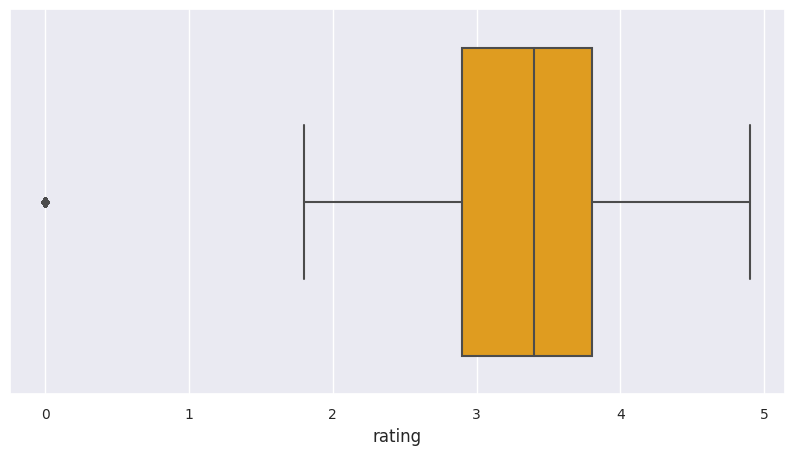

In [ ]:
sns.boxplot(x=df['rating'], color = 'orange')

**Detecting Outliers in votes**

<Axes: xlabel='votes'>

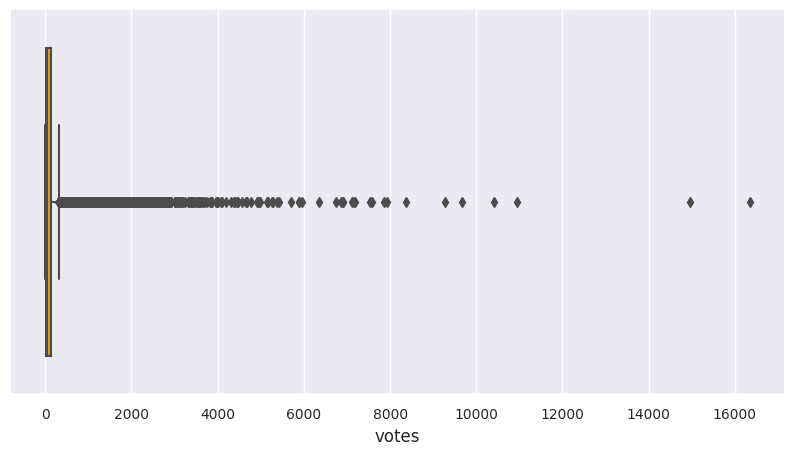

In [ ]:
sns.boxplot(x=df['votes'], color = 'orange')

**Detecting Outliers in cost**

<Axes: xlabel='average_cost_for_two'>

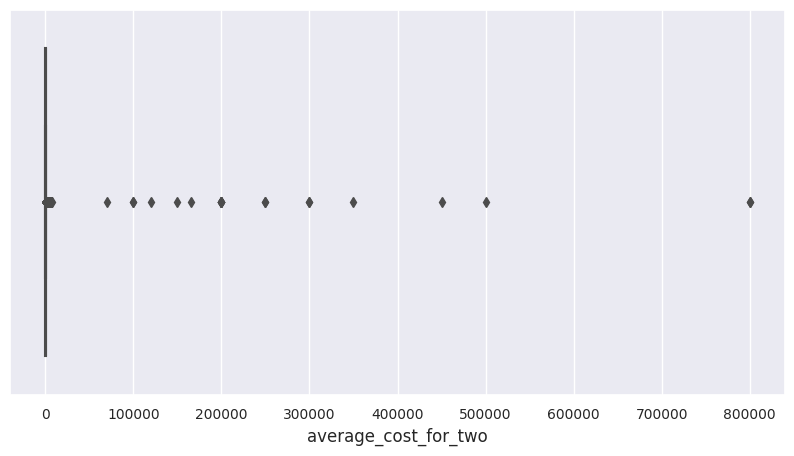

In [ ]:
sns.boxplot(x=df['average_cost_for_two'], color = 'orange')

#### 3.1.b Removing Outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75, numeric_only = True)
IQR = Q3 - Q1
print('Q1(quantile - 0.25) = ', Q1)
print('----------------------------------------------')
print('Q3(quantile - 0.75) = ', Q3)
print('----------------------------------------------')
print('IQR(Q3 - Q1) = ', IQR)

Q1(quantile - 0.25) =  average_cost_for_two    250.0
rating                    2.9
votes                     9.0
Name: 0.25, dtype: float64
----------------------------------------------
Q3(quantile - 0.75) =  average_cost_for_two    650.0
rating                    3.8
votes                   129.0
Name: 0.75, dtype: float64
----------------------------------------------
IQR(Q3 - Q1) =  average_cost_for_two    400.0
rating                    0.9
votes                   120.0
dtype: float64


In [ ]:
df_fix = df[~(((df < (Q1 - 1.5 *   IQR)) | (df > (Q3 + 1.5 *   IQR))).any(axis=1))]
df_fix.head(5)

,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
12,Silantro FilMex,Quezon City,filipino mexican,800,False,False,4.8,294,Phillipines
14,Sodam Korean Restaurant,San Juan City,korean,700,False,False,4.3,223,Phillipines
15,Cafe Arabelle,Santa Rosa,cafe american italian filipino,800,False,False,3.6,29,Phillipines
16,Nonnas Pasta Pizzeria,Santa Rosa,italian pizza,850,False,False,4.0,72,Phillipines
17,Balay Dako,Tagaytay City,filipino,1200,True,False,4.5,211,Phillipines


#### 3.1.c Dataset Size Difference

In [ ]:
print("Dataset shape before removing Outliers :", df.shape)
print("Dataset shape before after Outliers :",  df_fix.shape)
print("Outliers Rows in dataset :", (df.size - df_fix.size))
df = df_fix

Dataset shape before removing Outliers : (16604, 9)
Dataset shape before after Outliers : (11598, 9)
Outliers Rows in dataset : 45054


#### 3.1.d Plot after the removal of outliers

**Plot ratting column**

<Axes: xlabel='rating'>

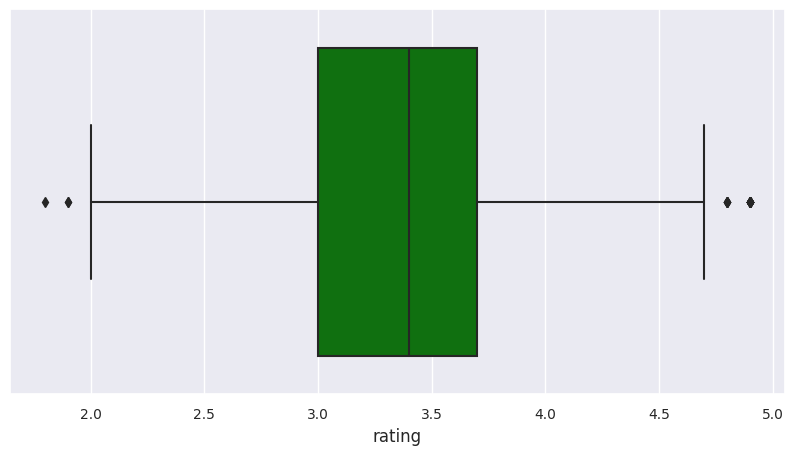

In [ ]:
sns.boxplot(x=df['rating'], color = 'green')

**Plot votes column**

<Axes: xlabel='votes'>

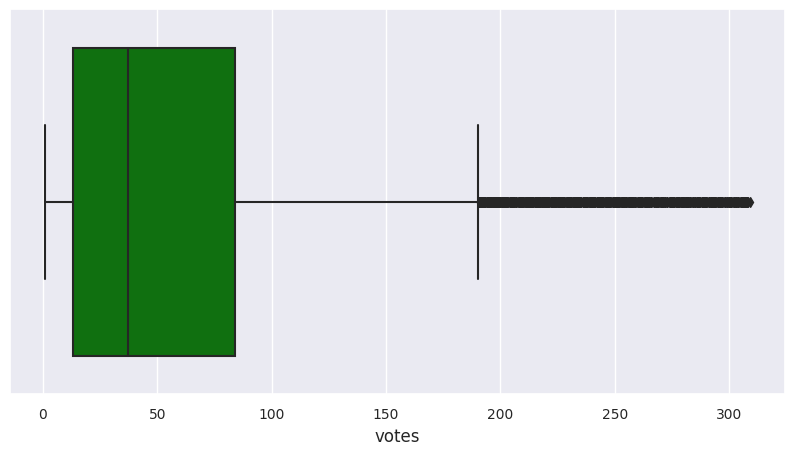

In [ ]:
sns.boxplot(x=df['votes'], color = 'green')

**Plot cost column**

<Axes: xlabel='average_cost_for_two'>

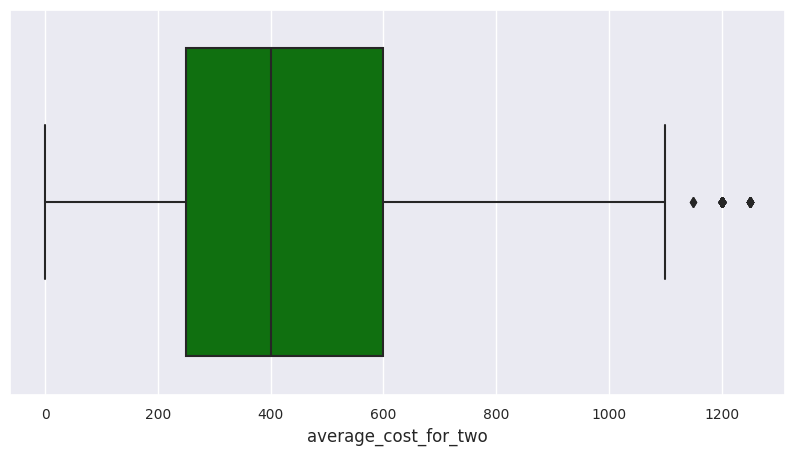

In [ ]:
sns.boxplot(x=df['average_cost_for_two'], color = 'green')

### 3.2 Illustrate unique rows frequencies

#### 3.2.a Restaurants

##### 3.2.a.1 Restaurants with most Branches
> We are going to visualize the restaurants with the most number of branches occurrences in our dataset.

Text(0.5, 0, 'No. of restaurant')

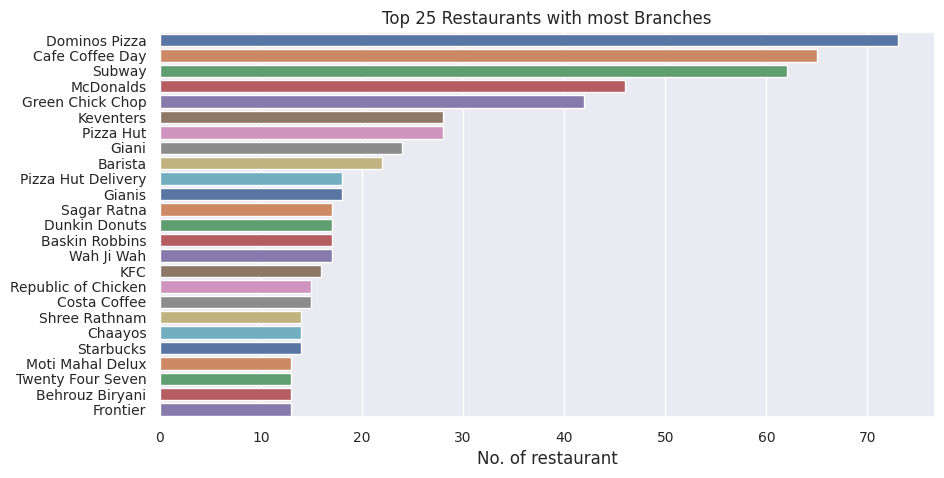

In [ ]:
plt.figure(figsize=(10,5))
chains = df['restaurant_name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top 25 Restaurants with most Branches")
plt.xlabel("No. of restaurant")

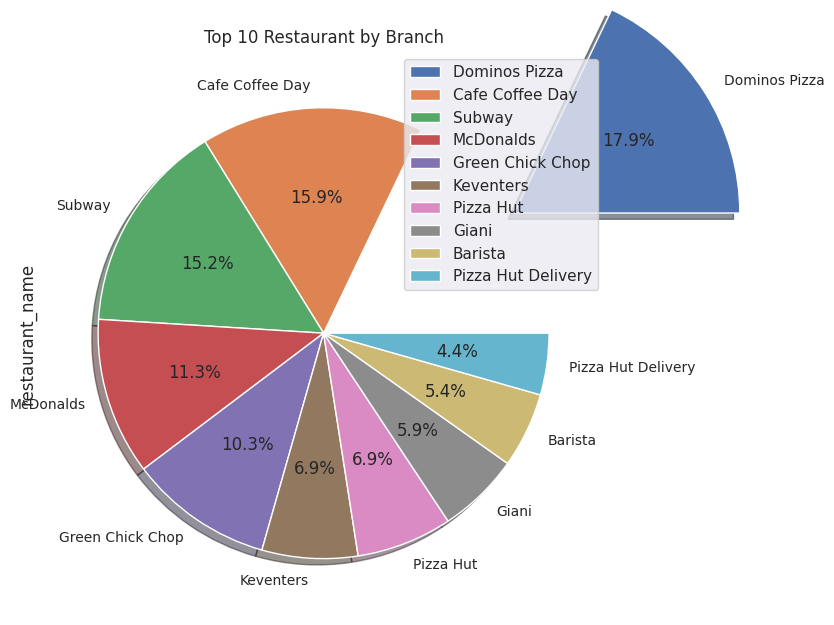

In [ ]:
plt.figure(figsize=(16,20))
plt.subplot(1,2,1)
df.restaurant_name.value_counts().nlargest(10).plot(kind="pie",shadow=True,explode = (1,0,0,0,0,0,0,0,0,0),autopct="%1.1f%%")
plt.title('Top 10 Restaurant by Branch')
plt.legend()
plt.savefig("most_restaurant.png")
plt.show()

##### 3.2.a.2 Restaurants with least Branches
> We are going to visualize the restaurants with the fewest number of branches occurrences in our dataset.

Text(0.5, 0, 'Restaurants Name')

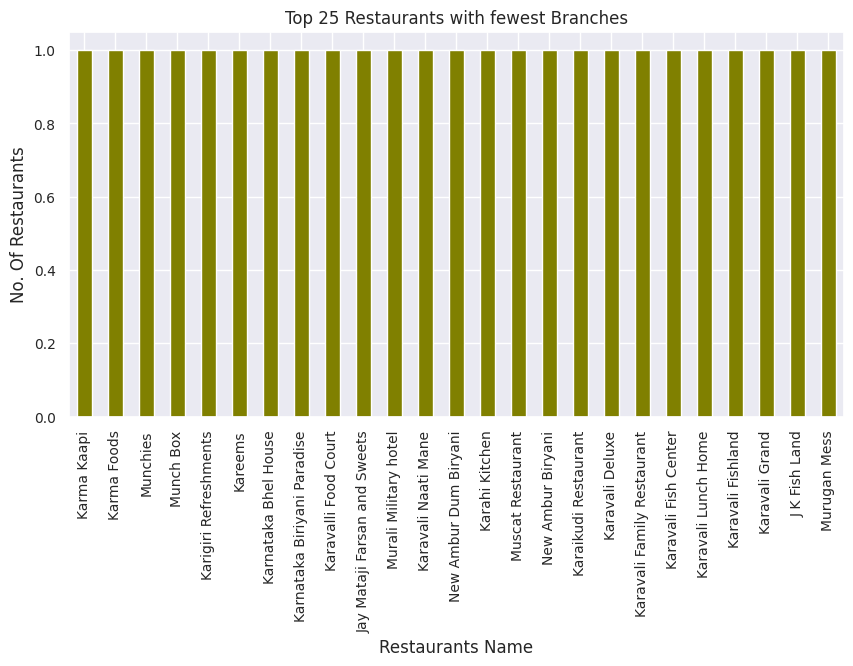

In [ ]:
df.restaurant_name.value_counts().nsmallest(25).plot(kind='bar',figsize=(10,5),color="olive")
plt.title('Top 25 Restaurants with fewest Branches')
plt.ylabel('No. Of Restaurants')
plt.xlabel('Restaurants Name')

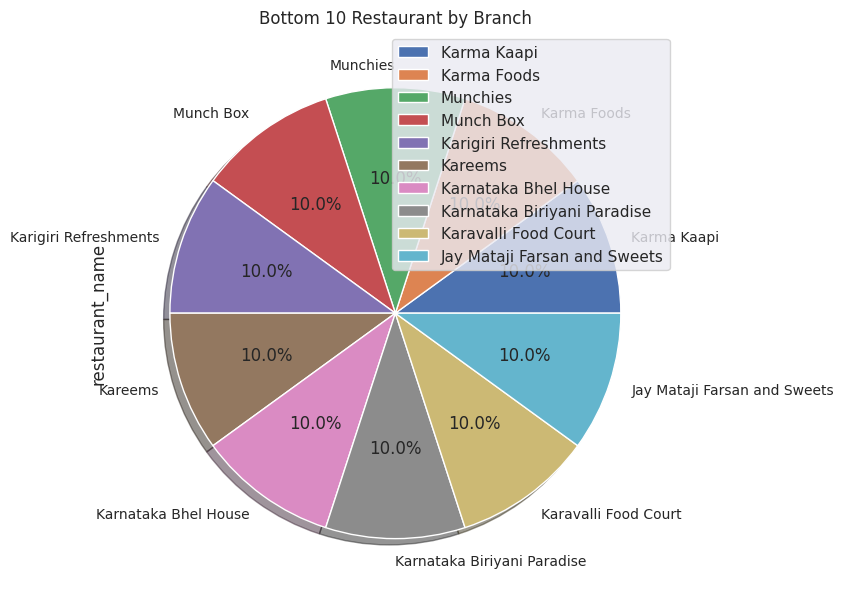

In [ ]:
plt.figure(figsize=(16,20))
plt.subplot(1,2,1)
df.restaurant_name.value_counts().nsmallest(10).plot(kind="pie",shadow=True,explode = (0,0,0,0,0,0,0,0,0,0),autopct="%1.1f%%")
plt.title('Bottom 10 Restaurant by Branch')
plt.legend()
plt.savefig("least_restaurant.png")
plt.show()

#### 3.2.b Countries and Restaurants
> We will be visualizing the countries that have the highest number of restaurants.

Text(0.5, 0, 'No. of restaurant')

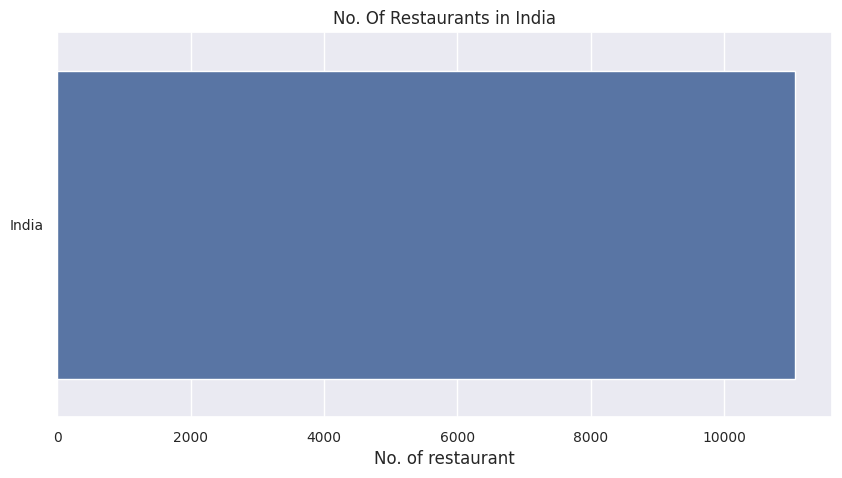

In [ ]:
plt.figure(figsize=(10,5))
chains = df[(df['country']=='India')]['country'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("No. Of Restaurants in India")
plt.xlabel("No. of restaurant")

Text(0, 0.5, 'Country')

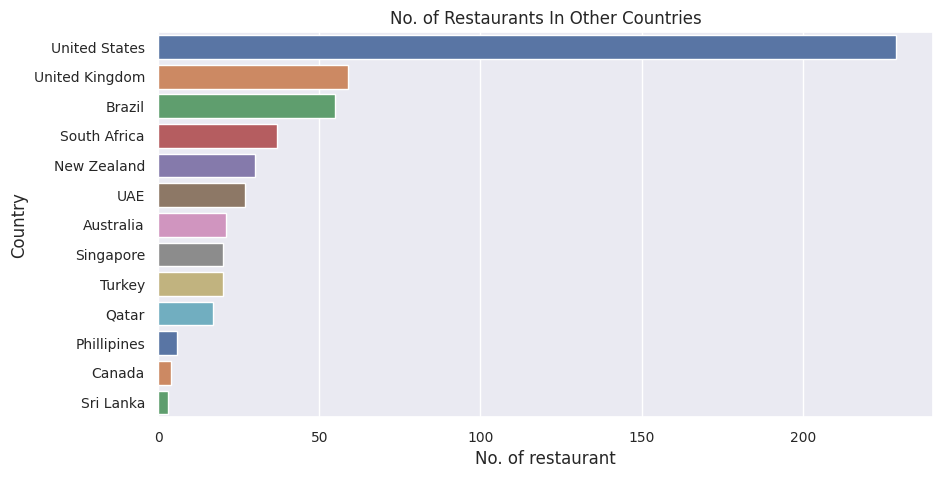

In [ ]:
plt.figure(figsize=(10,5))
chains = df[(df['country']!='India')]['country'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("No. of Restaurants In Other Countries")
plt.xlabel("No. of restaurant")
plt.ylabel("Country")

#### 3.2.c Cities and Restaurants
> We will be visualizing the all the cities that have the highest number of restaurants.

Text(0, 0.5, 'No. of Restaurants')

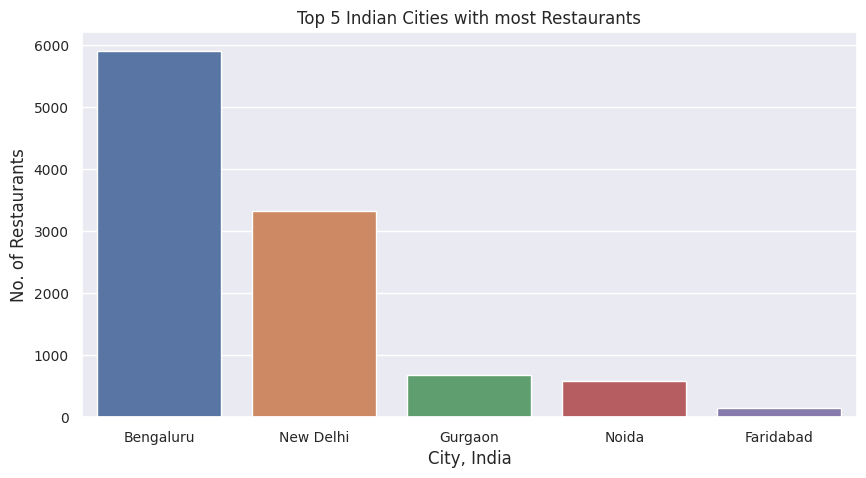

In [ ]:
plt.figure(figsize=(10,5))
chains = df[(df['country']=='India')]['city'].value_counts()[:5]
sns.barplot(y=chains,x=chains.index,palette='deep')
plt.title("Top 5 Indian Cities with most Restaurants")
plt.xlabel("City, India")
plt.ylabel("No. of Restaurants")

Text(0, 0.5, 'No. of Restaurants')

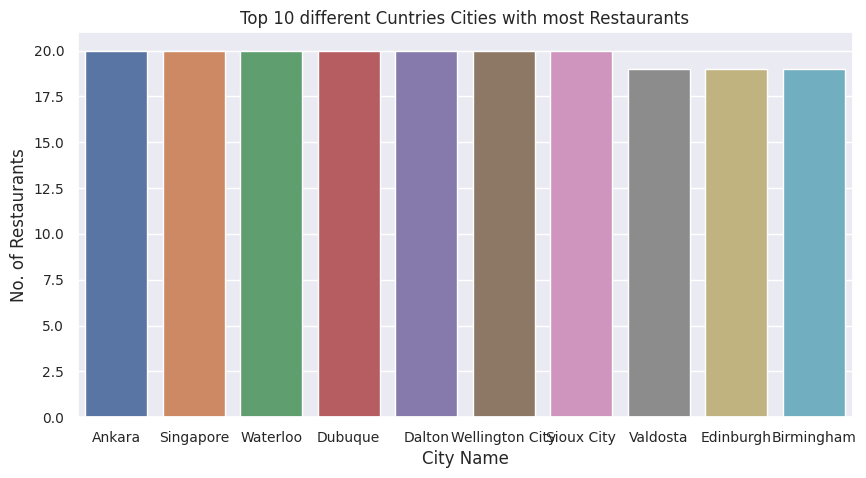

In [ ]:
plt.figure(figsize=(10,5))
chains = df[(df['country']!='India')]['city'].value_counts()[:10]
sns.barplot(y=chains,x=chains.index,palette='deep')
plt.title("Top 10 different Cuntries Cities with most Restaurants")
plt.xlabel("City Name")
plt.ylabel("No. of Restaurants")

#### 3.2.d Rating
The restaurants receive ratings ranging from 0 to 5. Which rating is mosty given to the restaurants




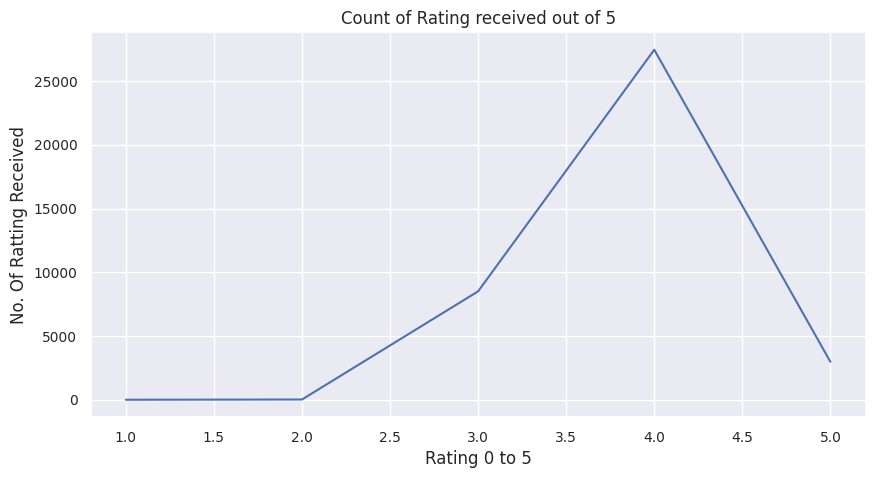

In [ ]:
rattingRange = df.groupby(pd.cut(df["rating"], [0,1,2,3,4,5])).sum()
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4,5],rattingRange['rating'])
plt.xlabel('Rating 0 to 5')
plt.ylabel('No. Of Ratting Received')
plt.title('Count of Rating received out of 5')
plt.show()

#### 3.2.e Votes
The count of distinct votes received by customers for a restaurant will assist us in depicting the spectrum of votes typically bestowed upon restaurants.




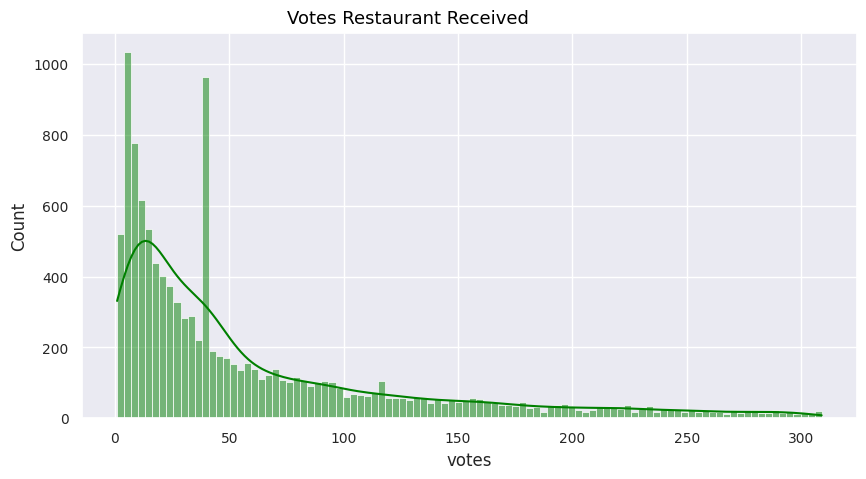

In [ ]:
plt.figure(figsize=(10,5))
plt.gcf().text(.33, .90,
               "Votes Restaurant Received",
               fontsize = 13,
               color='Black')
sns.histplot(df['votes'],
             bins=100,
             kde=True,
             color= 'green'
             )
sns.set(rc={'xtick.labelsize':10,
            'ytick.labelsize':10})
plt.show()

#### 3.2.f Cost for 2 persons
The price of meals for two individuals at a dining in a restaurant.




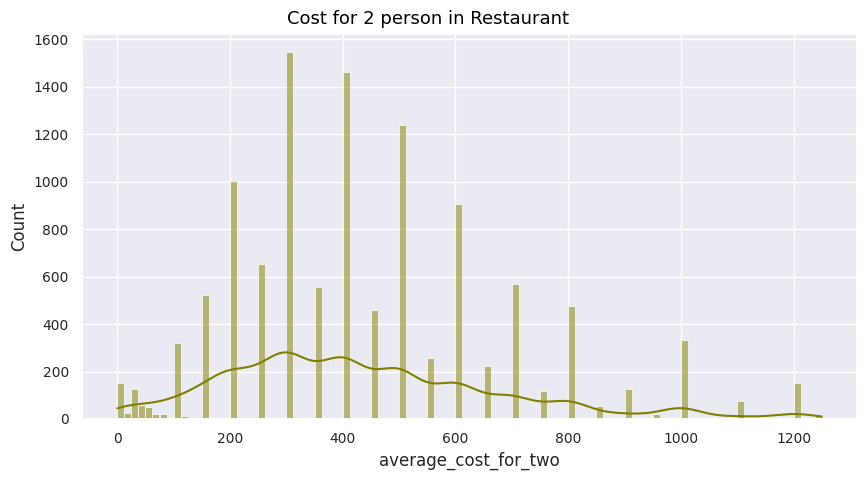

In [ ]:
plt.figure(figsize=(10,5))
plt.gcf().text(.33, .90,
               "Cost for 2 person in Restaurant",
               fontsize = 13,
               color='Black')
sns.histplot(df['average_cost_for_two'],
             bins=100,
             kde=True,
             color= 'olive'
             )
sns.set(rc={'xtick.labelsize':10,
            'ytick.labelsize':10})
plt.show()

#### 3.2.g Online Order
Number of Restaurants accepting online orders



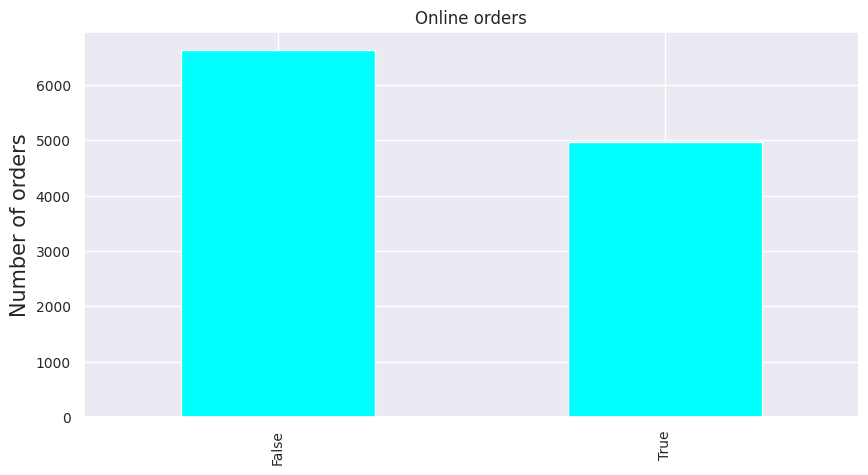

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df['has_online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders')
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

#### 3.2.h Table Booking
Number of Restaurants has book table option


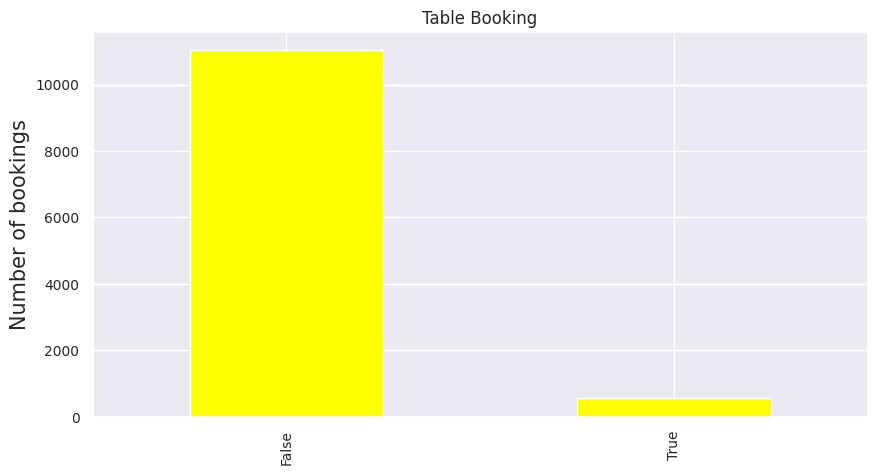

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
df['has_table_booking'].value_counts().plot.bar(color = 'yellow')
plt.title('Table Booking')
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

#### 3.2.i Cuisines
Print top 10 Cuisines which are famous among diffeent restaurants.



In [ ]:
cuisines_count= []
for i in df.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

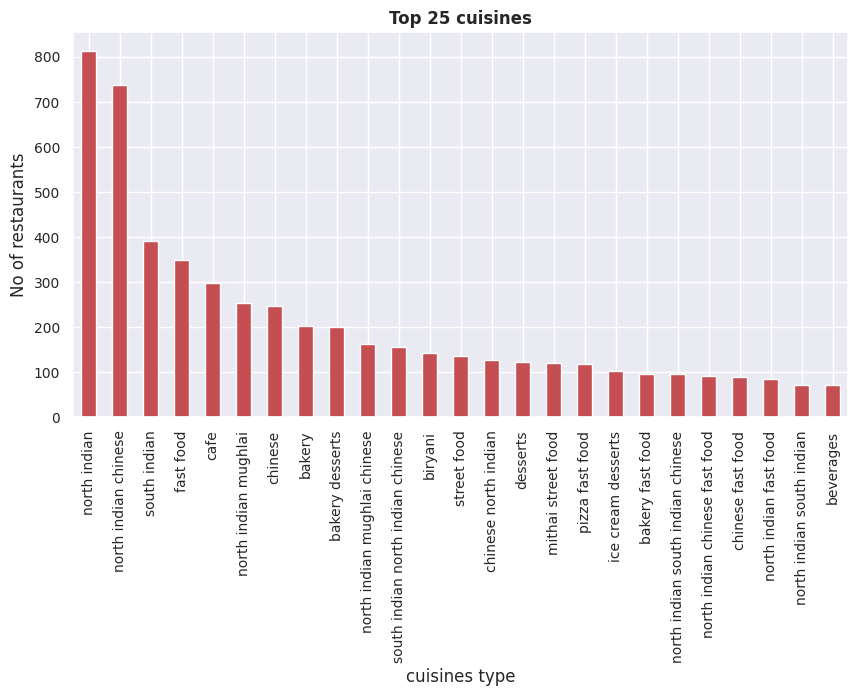

In [ ]:
plt.figure(figsize=(10,5))
pd.Series(cuisines_count).value_counts()[:25].plot(kind='bar',color= 'r')
plt.title('Top 25 cuisines',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

### 3.3 Correlation between different variables


In [ ]:
#Encode the input Variables
def Encode(dframe):
    for column in dframe.columns[~dframe.columns.isin(['rating', 'cost_of_two_person', 'votes'])]:
        dframe[column] = dframe[column].factorize()[0]
    return dframe

df_en = Encode(df.copy())

Index(['restaurant_name', 'city', 'cuisines', 'average_cost_for_two',
       'has_table_booking', 'has_online_order', 'rating', 'votes', 'country'],
      dtype='object')

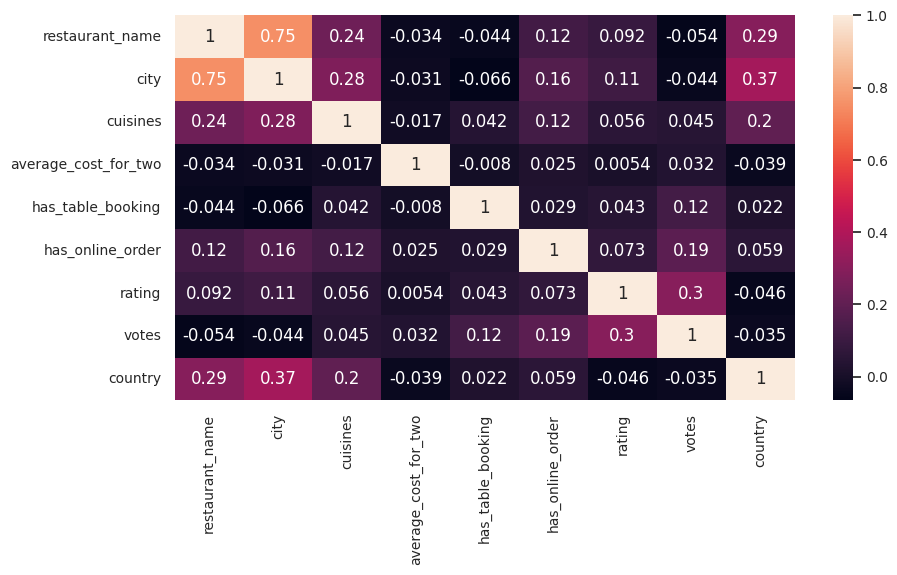

In [ ]:
#Get Correlation between different variables
corr = df_en.corr(method='kendall')
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
df_en.columns

#### 3.3.a Correlation b/w the two people’s cost and a restaurant’s ratings

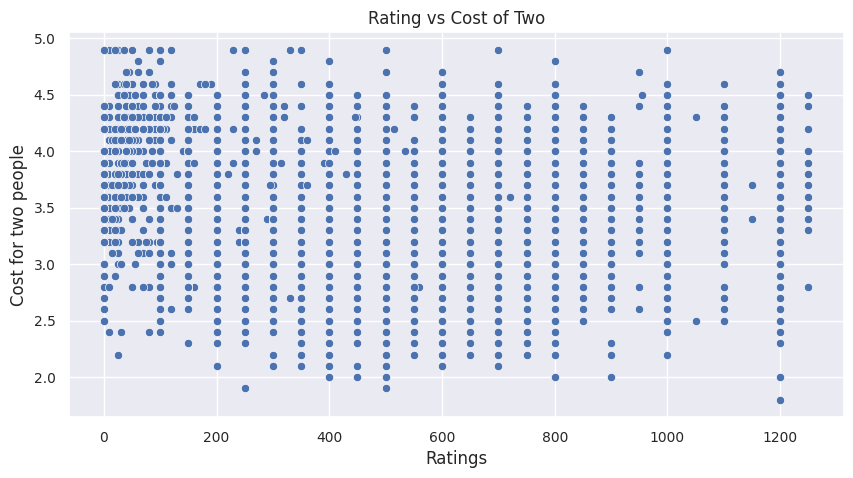

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.scatterplot(x ='average_cost_for_two', y= 'rating', data=df)
plt.xlabel('Ratings')
plt.ylabel('Cost for two people')
plt.title('Rating vs Cost of Two');


In [ ]:
chains = df[(df['average_cost_for_two'] > 1000)]['rating'].sort_values(ascending=False)
chains

1837     4.7
7180     4.6
1221     4.6
768      4.6
11330    4.5
        ... 
15493    2.5
4079     2.4
3421     2.3
9106     2.0
9507     1.8
Name: rating, Length: 246, dtype: float64

> As we can see, restaurants that cost less have better reviews than restaurants that are expensive.



#### 3.3.b Correlation b/w votes and ratings

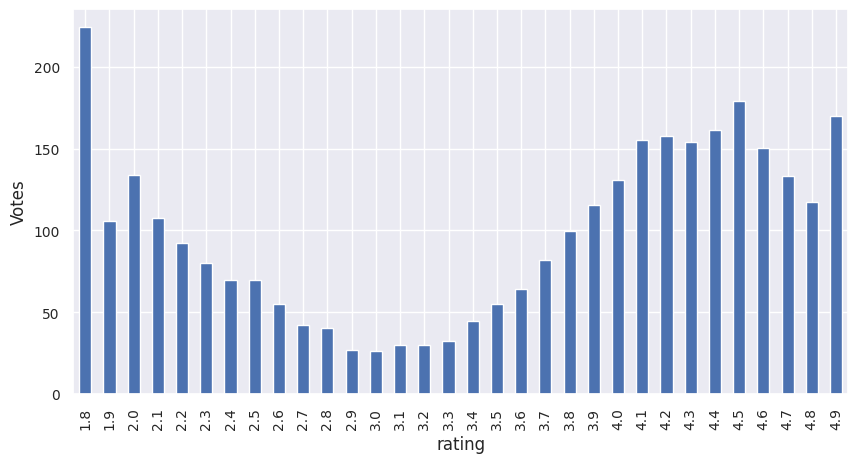

In [ ]:
# Let us group by Aggregate Rating, Votes and plot a Bar Chart
df.groupby('rating')['votes'].mean().plot(kind='bar')
# Plotting the Votes on the y label
plt.ylabel('Votes')
plt.show();

#### 3.3.c Correlation b/w Online Order and ratings

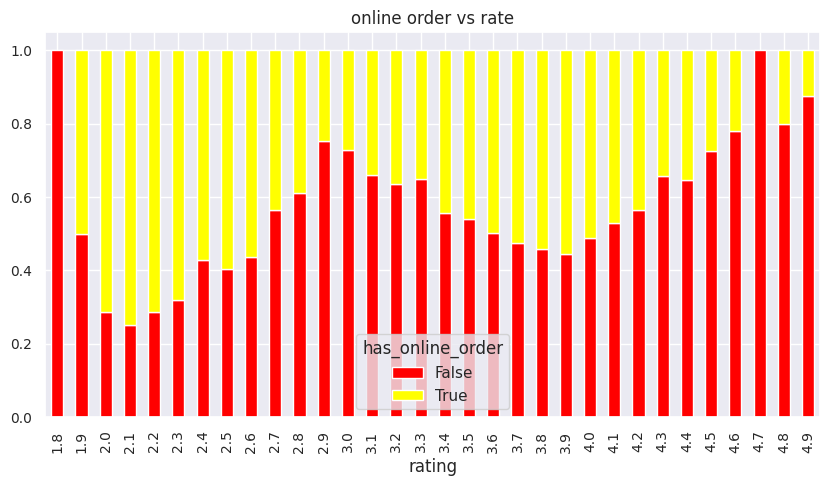

In [ ]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (10, 5)
x = pd.crosstab(df['rating'], df['has_online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate')
plt.show()

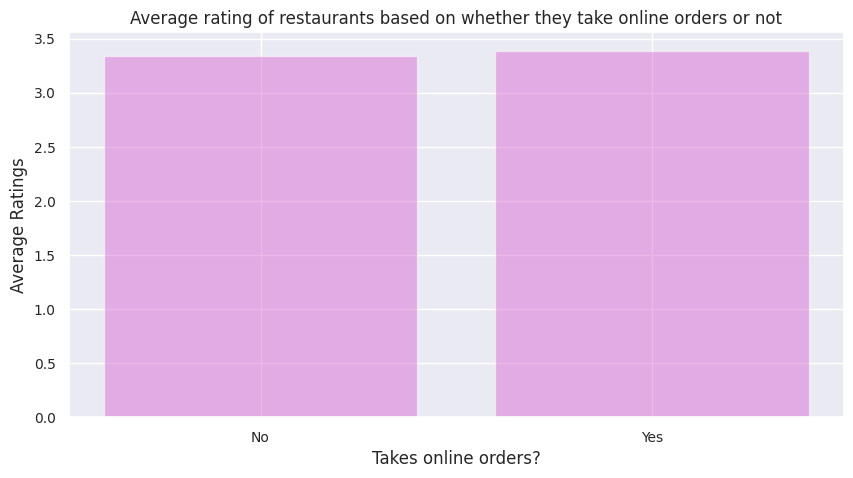

In [ ]:
grp1=df.groupby('has_online_order')['rating'].mean().reset_index()
grp1['has_online_order'] = ['No','Yes']
plt.figure(figsize=(10,5))
plt.bar(grp1['has_online_order'],grp1['rating'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?')
plt.ylabel('Average Ratings')
plt.title('Average rating of restaurants based on whether they take online orders or not')
plt.show()

> Restaurants receive almost the same average ratings from customers irrespective of whether they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

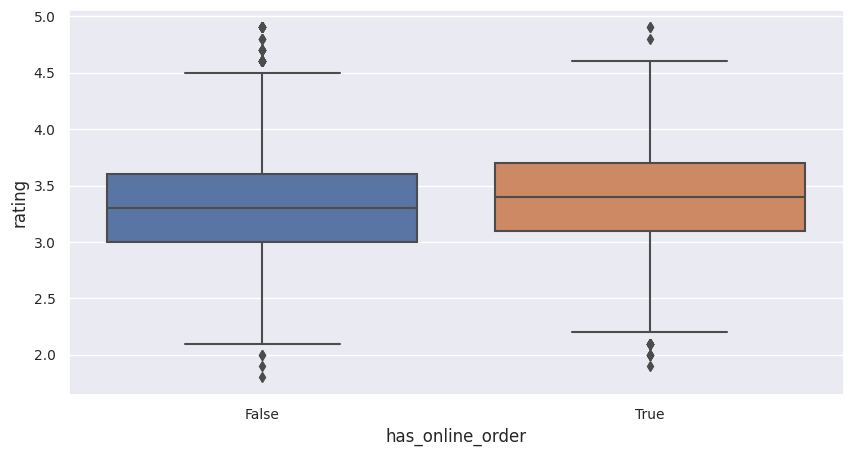

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(df, x="has_online_order", y="rating")

#### 3.3.d Correlation b/w Table booking and ratings

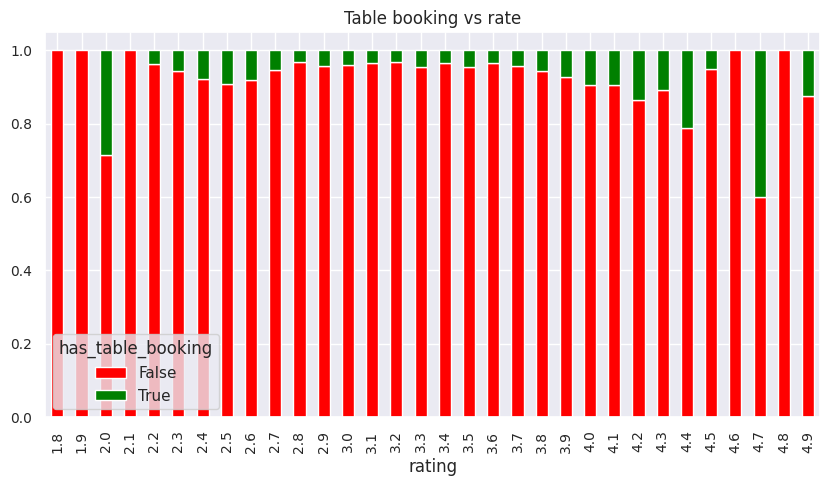

In [ ]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (10, 5)
x = pd.crosstab(df['rating'], df['has_table_booking'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'])
plt.title('Table booking vs rate')
plt.show()

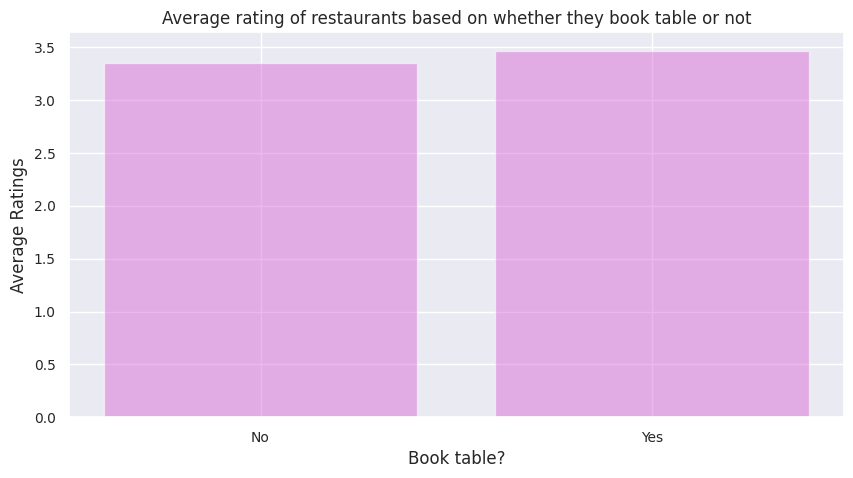

In [ ]:
grp2=df.groupby('has_table_booking')['rating'].mean().reset_index()
grp2['has_table_booking'] = ['No','Yes']
plt.figure(figsize=(10,5))
plt.bar(grp2['has_table_booking'],grp2['rating'],alpha=0.5,color='orchid')
plt.xlabel('Book table?')
plt.ylabel('Average Ratings')
plt.title('Average rating of restaurants based on whether they book table or not')
plt.show()

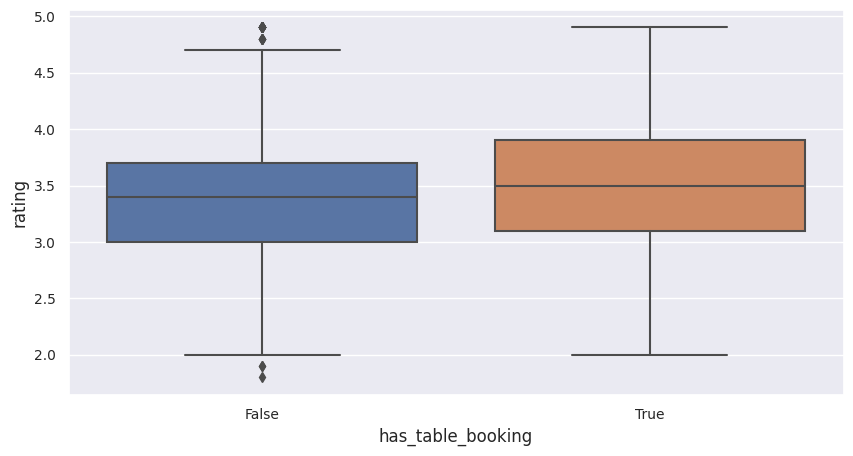

In [ ]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(df, x="has_table_booking", y="rating")

In [ ]:
cuisines_count= []
for i in df.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

In [ ]:
np.unique(cuisines_count)

array(['afghani', 'african portuguese', 'american', ...,
       'western fusion fast food', 'world cuisine',
       'world cuisine mexican italian'], dtype='<U86')

In [ ]:
b=df.groupby('cuisines')['rating'].mean().reset_index().sort_values(by='rating',ascending=False)
print(b.head(5))


                              cuisines  rating
19               american burger grill     4.9
2389                             tapas     4.9
1290  healthy food salad mediterranean     4.9
2425                     world cuisine     4.9
1552     mexican american healthy food     4.9


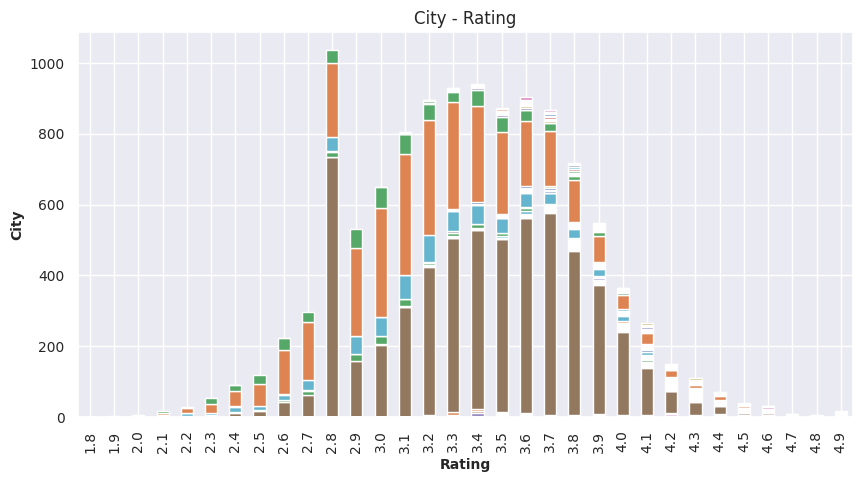

In [ ]:
#Location and Rating
plt.rcParams['figure.figsize'] = (10, 5)
loc_plt=pd.crosstab(df['rating'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('City - Rating')
plt.ylabel('City',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.legend().remove();

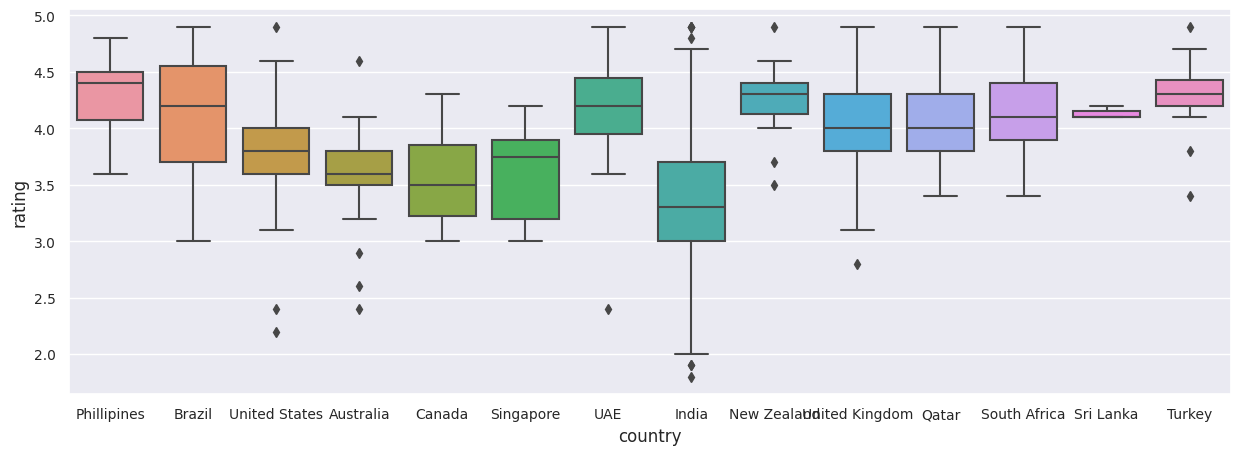

In [ ]:
plt.figure(figsize=(15,5))

fig = sns.boxplot(df, x="country", y="rating")

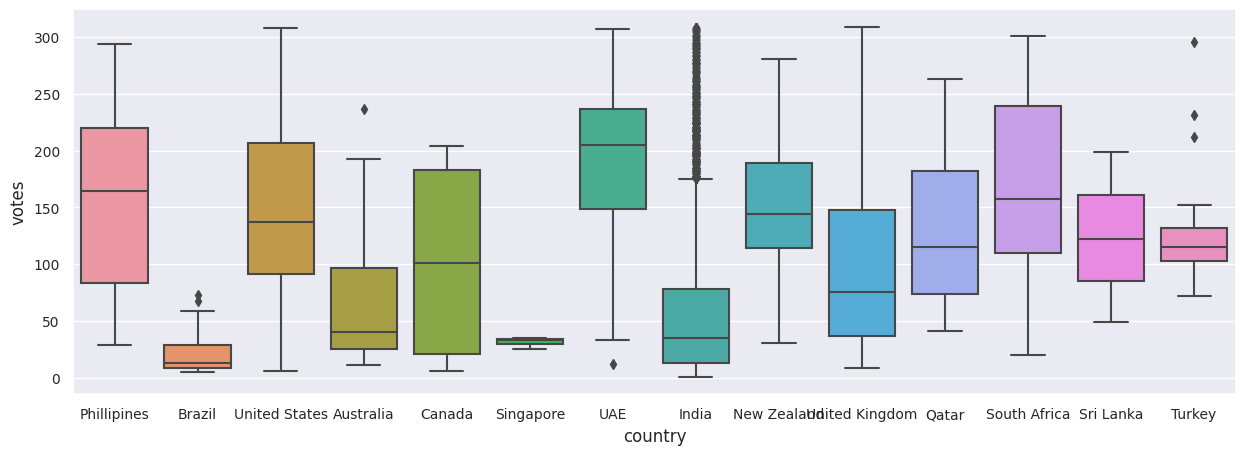

In [ ]:
plt.figure(figsize=(15,5))
fig = sns.boxplot(df, x="country", y="votes")

In [ ]:
fig = px.box(df, x="country", y="rating", color="has_online_order")
fig.update_traces()
fig.show()

In [ ]:
fig = px.box(df, x="country", y="rating", color="has_table_booking")
fig.update_traces()
fig.show()

## Top restaurant by ratting

Text(0.5, 1.0, 'Top Rated 10 Restaurants')

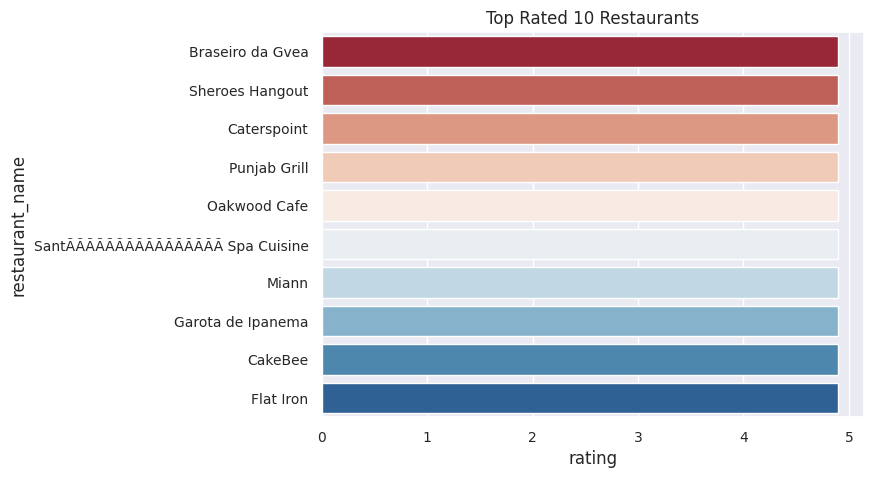

In [ ]:
df_rating = df.drop_duplicates(subset='restaurant_name')
df_rating = df_rating.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='rating', y='restaurant_name', palette='RdBu')
plt.title('Top Rated 10 Restaurants')

Text(0.5, 0, 'Restaurant Ratting out of 5')

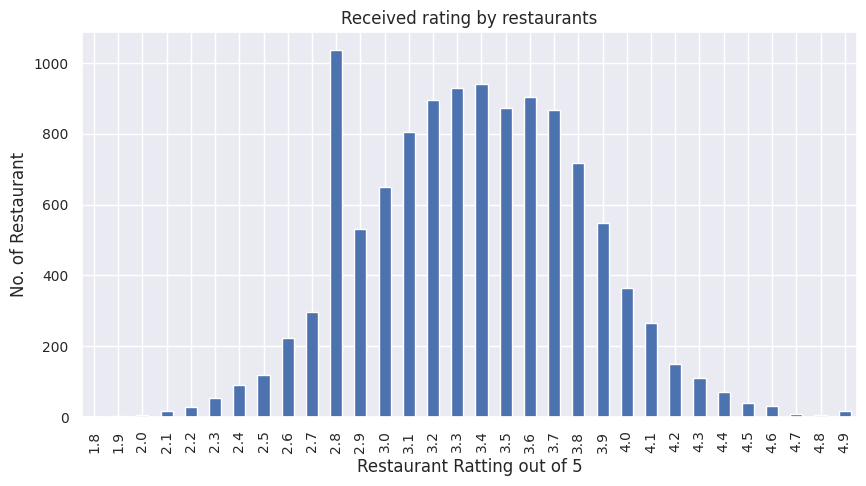

In [ ]:
df.rating.value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Received rating by restaurants")
plt.ylabel('No. of Restaurant')
plt.xlabel('Restaurant Ratting out of 5')

## 4 - MODELING

### 4.1 Recommendation
> Provides recommendation of the items that are more relevant to the search item or are realted to the search history of the user. They are active information filtering systems which personalize the information coming to a user based on his interests, relevance of the information etc.

In [ ]:
df_copy = df.copy()
df_copy.set_index('restaurant_name', inplace=True)
indices = pd.Series(df_copy.index)
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_copy['city'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommend(name, cosine_similarities = cosine_similarities):

    # Create a list to put top 10 restaurants
    recommend_restaurant = []

    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_copy.index)[each])

    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'rating', 'average_cost_for_two'])

    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_copy[['cuisines','rating', 'average_cost_for_two']][df_copy.index == each].sample()))

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','rating', 'average_cost_for_two'], keep=False)
    df_new = df_new.sort_values(by='rating', ascending=False).head(10)

    print('\n\n------------------------------------------------\n\nTOP %s RESTAURANTS LIKE %s WITH SIMILAR FEATURES \n\n------------------------------------------------\n ' % (str(len(df_new)), name))

    return df_new

In [ ]:
chains = df_copy[(df_copy['country'] == 'United States')]
chains.head()

,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
restaurant_name,,,,,,,,
Austins BBQ and Oyster Bar,Albany,bbq burger seafood,25,False,False,3.3,35,United States
BJs Country Buffet,Albany,american bbq,10,False,False,3.3,25,United States
El Vaquero Mexican Restaurant,Albany,mexican,0,False,False,3.4,45,United States
Elements Coffee Co Northwest,Albany,coffee tea sandwich,10,False,False,3.4,26,United States
ChickfilA,Albany,fast food,10,False,False,3.5,67,United States


In [ ]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df_copy[df_copy.index == 'Harvest Moon'].head()

,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country
restaurant_name,,,,,,,,
Harvest Moon,Albany,pizza bar food sandwich,25,False,False,3.7,147,United States


#### 4.1.a Display Recommend items

In [ ]:
recommend('Harvest Moon')



------------------------------------------------

TOP 10 RESTAURANTS LIKE Harvest Moon WITH SIMILAR FEATURES 

------------------------------------------------
 


,cuisines,rating,average_cost_for_two
Silantro FilMex,filipino mexican,4.8,800
Hotel Dwarka,south indian,4.2,250
Guang Zhou Chinese Restaurant,asian chinese vegetarian,3.9,10
The Catch Seafood Room Oyster Bar,seafood tapas bar food,3.8,40
House of China Restaurant II,chinese,3.8,10
Hotel Chandrika,south indian north indian chinese street food,3.8,400
Harvest Moon,pizza bar food sandwich,3.7,25
Villa Gargano,italian pizza,3.7,10
Hotel Crossroads,andhra biryani,3.6,650
Hotel Durga Shree Grand,south indian north indian chinese street food,3.6,200


### 4.2 Prediction through regression
> Provides recommendation of the items that are more relevant to the search item or are realted to the search history of the user. They are active information filtering systems which personalize the information coming to a user based on his interests, relevance of the information etc.

#### 4.2.a Get Dataframe dummies

In [ ]:
df['online_order']= pd.get_dummies(df.has_online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.has_table_booking, drop_first=True)
df

<ipython-input-208-e9b7e0fbfd1e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-208-e9b7e0fbfd1e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,restaurant_name,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,rating,votes,country,online_order,book_table
12,Silantro FilMex,Quezon City,filipino mexican,800,False,False,4.8,294,Phillipines,0,0
14,Sodam Korean Restaurant,San Juan City,korean,700,False,False,4.3,223,Phillipines,0,0
15,Cafe Arabelle,Santa Rosa,cafe american italian filipino,800,False,False,3.6,29,Phillipines,0,0
16,Nonnas Pasta Pizzeria,Santa Rosa,italian pizza,850,False,False,4.0,72,Phillipines,0,0
17,Balay Dako,Tagaytay City,filipino,1200,True,False,4.5,211,Phillipines,0,1
...,...,...,...,...,...,...,...,...,...,...,...
16637,Masaba۱,Ankara,kebab turkish pizza,100,False,False,4.2,103,Turkey,0,0
16638,Zigana Pide,Ankara,turkish pizza,50,False,False,4.3,103,Turkey,0,0
16639,D_verolu,Ankara,kebab desserts turkish pizza,70,False,False,4.4,131,Turkey,0,0
16640,D_verolu,Ankara,kebab desserts turkish pizza,70,False,False,4.2,152,Turkey,0,0


#### 4.2.b Clean Cuisines Text

In [ ]:
# removed ',' between two words; then converted to categorical features
df['cuisines'] = df['cuisines'].str.replace(',' , '')
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'].value_counts().head()

<ipython-input-209-73aa03d45908>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-209-73aa03d45908>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



chinese indian north                 865
indian north                         814
indian south                         391
chinese indian indian north south    350
fast food                            350
Name: cuisines, dtype: int64

#### 4.2.c Splitting the data for Model Building

In [ ]:
# build x & y dataset
x = df.drop(['rating','restaurant_name'],axis = 1)
y = df['rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)
X_train

,city,cuisines,average_cost_for_two,has_table_booking,has_online_order,votes,country,online_order,book_table
10687,Bengaluru,continental indian italian north,1200,False,False,27,India,0,0
6008,New Delhi,asian chinese fast food indian italian japanes...,900,True,False,32,India,0,1
1620,Gurgaon,chinese,200,False,False,16,India,0,0
4566,New Delhi,cream desserts ice,400,False,True,38,India,1,0
8321,Noida,fast food,400,False,False,19,India,0,0
...,...,...,...,...,...,...,...,...,...
15691,Bengaluru,desserts fast food,500,False,True,37,India,1,0
964,Faridabad,indian north,400,False,False,26,India,0,0
9660,Bengaluru,chinese indian indian north south,400,False,False,62,India,0,0
4152,New Delhi,fast food,500,False,True,19,India,1,0


In [ ]:
## ALWAYS AVOID DATA LEAKAGE
# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [ ]:
# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'city' )
te_dummy_city= one_hot_transform(X_test,'city')

tr_dummy_county = one_hot_fit_transform(X_train,'country' )
te_dummy_county= one_hot_transform(X_test,'country')

tr_dummy_tb = one_hot_fit_transform(X_train,'has_table_booking' )
te_dummy_tb = one_hot_transform(X_test,'has_table_booking')


tr_dummy_oo = one_hot_fit_transform(X_train,'has_online_order' )
te_dummy_oo = one_hot_transform(X_test,'has_online_order')


# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines=one_hot_transform(X_test,'cuisines')

In [ ]:
tr =pd.DataFrame(pd.np.column_stack([tr_dummy_oo,tr_dummy_tb,tr_dummy_county, tr_dummy_city, tr_dummy_cuisines]))

l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(8118, 1487)

In [ ]:
te =pd.DataFrame(pd.np.column_stack([ te_dummy_oo,te_dummy_tb,te_dummy_county,te_dummy_city,te_dummy_cuisines]))

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(3480, 1487)

In [ ]:
X_train =X_train.drop(['city','cuisines','has_table_booking','has_online_order','country'],axis = 1)
X_test =X_test.drop(['city','cuisines','has_table_booking','has_online_order','country'],axis = 1)


In [ ]:
X_train.head(3)


,average_cost_for_two,votes,online_order,book_table,0,1,2,3,4,5,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
0,1200,27,0,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,900,32,0,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200,16,0,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head(3)


,average_cost_for_two,votes,online_order,book_table,0,1,2,3,4,5,...,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477
0,650,198,1,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,500,42,0,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,300,6,1,0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.2.d Calculating Mean Squared Error

In [ ]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2)

mse_scorer = make_scorer(mse, greater_is_better=False)

#### 4.2.e Using Model

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

rfr = RandomForestRegressor(max_depth=None,n_estimators=200,min_samples_split= 2)
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

0.12874701686287857

In [ ]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
2351,4.2,3.982000
9114,3.5,3.187500
13527,3.1,3.153806
15802,3.3,3.295500
7450,3.5,3.242000
...,...,...
11685,3.4,3.669875
12531,3.5,3.336193
2903,3.1,3.004033
15765,3.8,3.694500


#### 4.2.f Visualize Prediction vs Actual

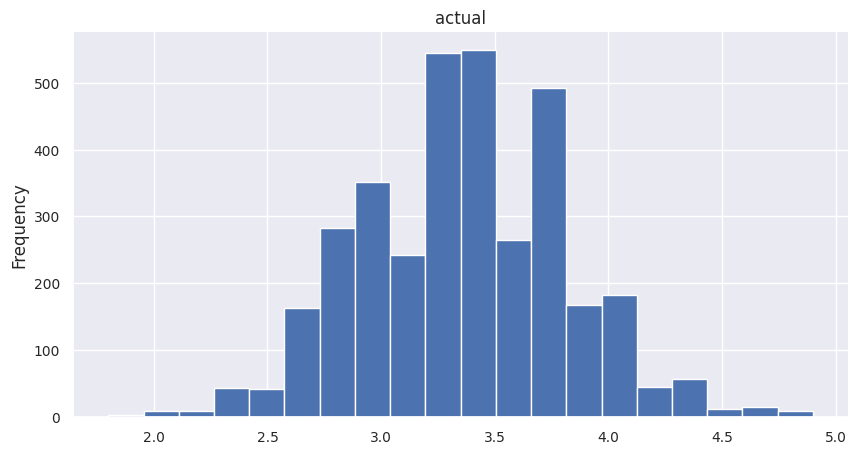

In [ ]:
Randpred['actual'].plot(kind='hist', bins=20, title='actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

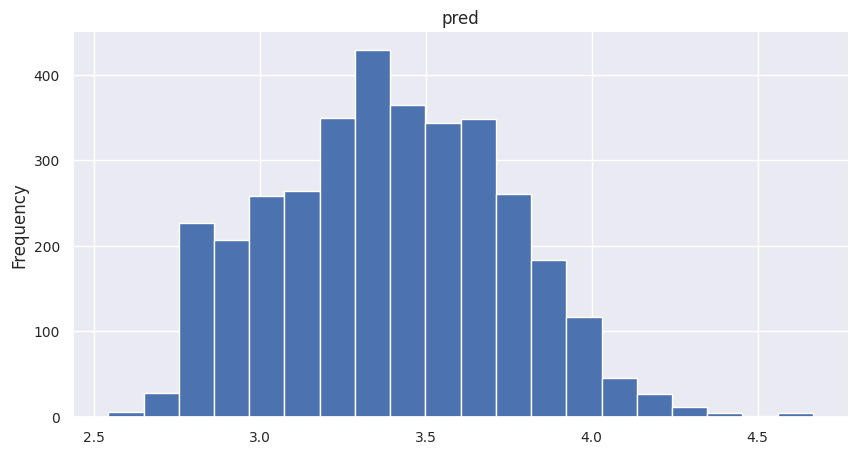

In [ ]:
Randpred['pred'].plot(kind='hist', bins=20, title='pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

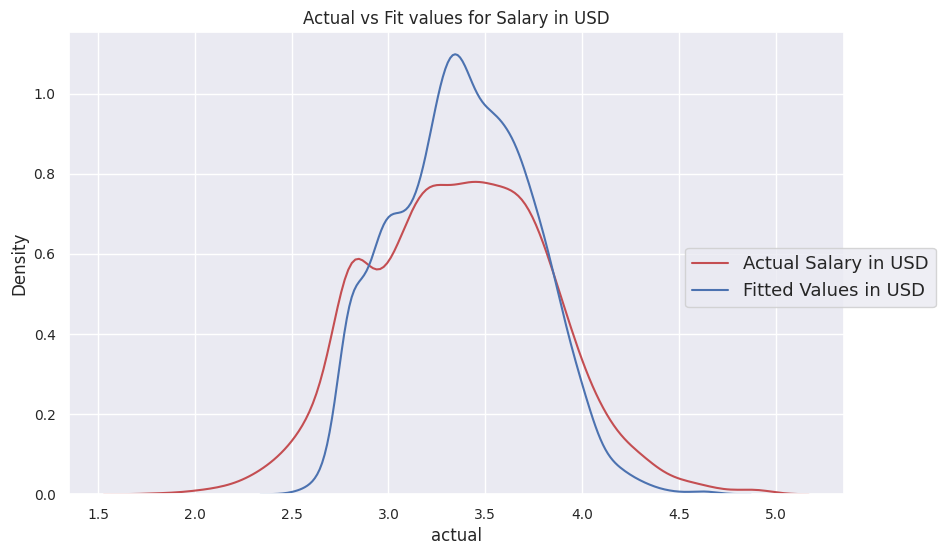

In [ ]:
ax, fig = plt.subplots(figsize= (10,6))
sns.kdeplot(Randpred['actual'], color="r", label='Actual Salary in USD')
sns.kdeplot(Randpred['pred'], color="b", label='Fitted Values in USD')

plt.title('Actual vs Fit values for Salary in USD')
ax.legend(loc='center right', fontsize=13)

plt.show()

## 5 - INSIGHT

Key Outcomes

* Restaurant ratings are highly influenced by the restaurant’s cuisine, facilities, and pricing.
* The locality where the restaurant is situated also helps in predicting whether the restaurant will run successfully or not.
* Places that sell desserts, beverages, and food delivery services tend to be the most popular among the customers.